#**Especialização em Ciência de Dados - INF/UFRGS e SERPRO**
## Disciplina CD005 - Redes Neurais e Aprendizado Profundo
### *Prof. Anderson Rocha Tavares*
### *Alunos: Carlos Eduardo Felix, André Gianini, Hermano Lira*
---

# **Projeto Final**

## Título: Implementação de uma Rede Neural para reconhecimento de padrões de doença cardíaca

---


Para a relização do projeto utilizamos o dataset Heart Disease Health Indicators Dataset.

Encontrado no link: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

Este conjunto de dados contém 253.680 respostas de pesquisa do BRFSS 2015 limpo para ser usado principalmente para a classificação binária de doenças cardíacas. Há forte desequilíbrio de classe neste conjunto de dados. 229.787 entrevistados não têm/não tiveram doença cardíaca, enquanto 23.893 tiveram doença cardíaca.

Os *dataset* já foi disponibilizado com os dados categóricos devidamente discretizados, o que nos poupou esta tarefa. No entanto, foi necessário realizar um pré-processamento dos dados, para submeter os mesmos ao processamento dos algoritmos selecionados.

In [2]:
## Carregando as bibliotecas básicas necessárias
%matplotlib inline
import pandas as pd             # para análise de dados
import matplotlib.pyplot as plt # para visualização de informações
import seaborn as sns           # para visualização de informações
import numpy as np              # para operações com arrays multidimensionais

sns.set()


In [3]:
## Bibliotecas para treinamento/avaliação de modelos
from sklearn.model_selection import RepeatedKFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
# Carregando os dados
df = pd.read_csv("https://drive.google.com/uc?export=view&id=1rAorGNPl9efufFp9-o3EfCFhZOiSPaPJ")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Por motivos de performance, tivemos de eliminar vários registros do dataset de forma aleatória. O dataset original, com mais de 250.000 registros, demorava cerca de quatro horas para executar os algoritmos usados no trabalho. Como o principal objetivo do estudo era entender as técnicas mostradas em aula, optamos por essa abordagem.

In [5]:
# Eliminando varios registros com classe HeartDiseaseorAttack=0 para nivelar as classes alvos

heartDatasetSemDoenca = df.loc[df['HeartDiseaseorAttack'] == 0]
heartDatasetSemDoenca = heartDatasetSemDoenca.iloc[:4500]
heartDatasetComDoenca = df.loc[df['HeartDiseaseorAttack'] == 1]
heartDatasetComDoenca = heartDatasetComDoenca.iloc[:500]
df = pd.concat([heartDatasetSemDoenca, heartDatasetComDoenca])
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,1.0,1.0,1.0,1.0,27.0,1.0,0.0,2.0,1.0,1.0,...,1.0,0.0,4.0,0.0,20.0,1.0,1.0,11.0,6.0,7.0
4583,1.0,1.0,1.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,5.0,30.0,30.0,0.0,0.0,9.0,6.0,1.0
4589,1.0,0.0,0.0,1.0,41.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,5.0,6.0
4595,1.0,1.0,1.0,1.0,24.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0


In [6]:
## Características gerais do dataset
print("O conjunto de dados possui {} linhas e {} colunas".format(df.shape[0], df.shape[1]))

O conjunto de dados possui 5000 linhas e 22 colunas


In [7]:
## Avalia se existem dados duplicados
print(f'Existem instâncias duplicadas? {df.duplicated().any()}')

## Removendo duplicados
df.drop_duplicates(keep='last').shape
df = df.drop_duplicates(keep='last')

Existem instâncias duplicadas? True


In [8]:
## Características gerais do dataset
print("Agora o conjunto de dados possui {} linhas e {} colunas".format(df.shape[0], df.shape[1]))

Agora o conjunto de dados possui 4986 linhas e 22 colunas


A coluna *HeartDiseaseorAttack* é nosso atributo binário alvo contendo a classificação de cada instância. Ela pode ser 1 no caso do paciente ter um problema cardíaco ou 0 no caso paciente não ter um problema cardíaco. Vejamos sua distribuição:

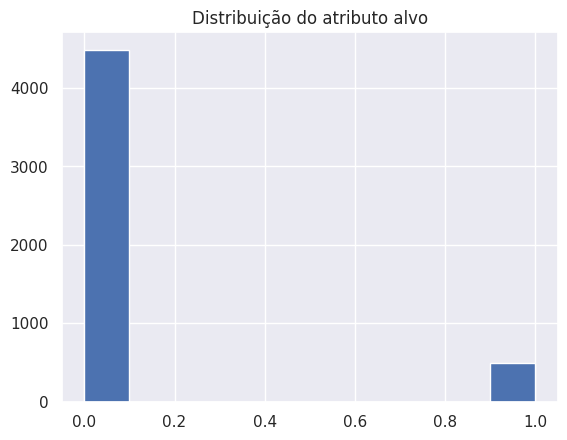

In [9]:
## Distribuição do atributo alvo
plt.hist(df['HeartDiseaseorAttack'])
plt.title("Distribuição do atributo alvo")
plt.show()

In [10]:
df['HeartDiseaseorAttack'].value_counts()

0.0    4486
1.0     500
Name: HeartDiseaseorAttack, dtype: int64

<Axes: ylabel='HeartDiseaseorAttack'>

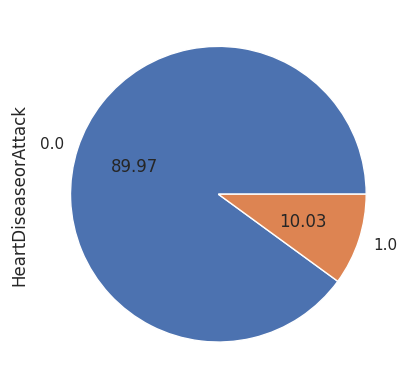

In [11]:
df['HeartDiseaseorAttack'].value_counts().plot.pie(autopct='%.2f')

Percebemos que nossa classe alvo é bem desbalanceada, com bem menos casos de problemas cardíacos.

Vejamos as informações das demais colunas:


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4986 entries, 0 to 4617
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  4986 non-null   float64
 1   HighBP                4986 non-null   float64
 2   HighChol              4986 non-null   float64
 3   CholCheck             4986 non-null   float64
 4   BMI                   4986 non-null   float64
 5   Smoker                4986 non-null   float64
 6   Stroke                4986 non-null   float64
 7   Diabetes              4986 non-null   float64
 8   PhysActivity          4986 non-null   float64
 9   Fruits                4986 non-null   float64
 10  Veggies               4986 non-null   float64
 11  HvyAlcoholConsump     4986 non-null   float64
 12  AnyHealthcare         4986 non-null   float64
 13  NoDocbcCost           4986 non-null   float64
 14  GenHlth               4986 non-null   float64
 15  MentHlth             

Vamos converter colunas classificadas como numéricas mas que, na verdade são categóricas.

In [13]:
df['HighBP'] = pd.Categorical(df.HighBP)
df['HighChol'] = pd.Categorical(df.HighChol)
df['CholCheck'] = pd.Categorical(df.CholCheck)
df['Smoker'] = pd.Categorical(df.Smoker)
df['Stroke'] = pd.Categorical(df.Stroke)
df['Diabetes'] = pd.Categorical(df.Diabetes)
df['PhysActivity'] = pd.Categorical(df.PhysActivity)
df['Fruits'] = pd.Categorical(df.Fruits)
df['Veggies'] = pd.Categorical(df.Veggies)
df['HvyAlcoholConsump'] = pd.Categorical(df.HvyAlcoholConsump)
df['AnyHealthcare'] = pd.Categorical(df.AnyHealthcare)
df['NoDocbcCost'] = pd.Categorical(df.NoDocbcCost)
df['GenHlth'] = pd.Categorical(df.GenHlth)
df['DiffWalk'] = pd.Categorical(df.DiffWalk)
df['Sex'] = pd.Categorical(df.Sex)
df['Education'] = pd.Categorical(df.Education)
df['Income'] = pd.Categorical(df.Income)


<ipython-input-13-ebebd3db19a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HighBP'] = pd.Categorical(df.HighBP)
<ipython-input-13-ebebd3db19a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HighChol'] = pd.Categorical(df.HighChol)
<ipython-input-13-ebebd3db19a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [14]:
print('Quantidade de valores faltantes por atributos:')
df.isnull().sum()

Quantidade de valores faltantes por atributos:


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Como atributos categóricos e numéricos podem demandar pré-processamentos diferentes, vamos separar os respectivos "nomes" em dois vetores distintos, facilitando a manipulação dos dados posteriormente.

In [15]:
## Verificando os tipos.
df.dtypes

HeartDiseaseorAttack     float64
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
Diabetes                category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                      float64
Education               category
Income                  category
dtype: object

In [16]:
## Separa os atributos em vetores, de acordo com o tipo de dado (categórico ou numérico)
cat_columns=list(df.drop(columns=['HeartDiseaseorAttack']).select_dtypes(include=['object', 'category']).columns)
print(f'cat_columns = {cat_columns}')

num_columns=list(df.drop(columns=['HeartDiseaseorAttack']).select_dtypes(include=["int64", "float64"]).columns)
print(f'num_columns = {num_columns}')

cat_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Income']
num_columns = ['BMI', 'MentHlth', 'PhysHlth', 'Age']


É sempre importante inspecionar os dados. Em relação a atributos categóricos, podemos inspecionar os valores que cada um pode assumir, quantas instâncias temos por valor de atributo, distribuição destes entre classes (não inspecionado nas células a seguir), etc. Em relação a atributos numéricos, é importante observar a distribuição de valores e se há ocorrência de outliers. O boxplot, por padrão, mostra outliers de acordo com o método do IQR (valores que estão 1.5*IQR acima do terceiro quartil ou abaixo do primeiro quartil).

In [17]:
## Obtém o número de valores distintos para os atributos categóricos.
df[cat_columns].nunique()

HighBP               2
HighChol             2
CholCheck            2
Smoker               2
Stroke               2
Diabetes             3
PhysActivity         2
Fruits               2
Veggies              2
HvyAlcoholConsump    2
AnyHealthcare        2
NoDocbcCost          2
GenHlth              5
DiffWalk             2
Sex                  2
Education            6
Income               8
dtype: int64

Gerar um gráfico para algumas variáveis categóricas com a distribuição de frequência entre as classes

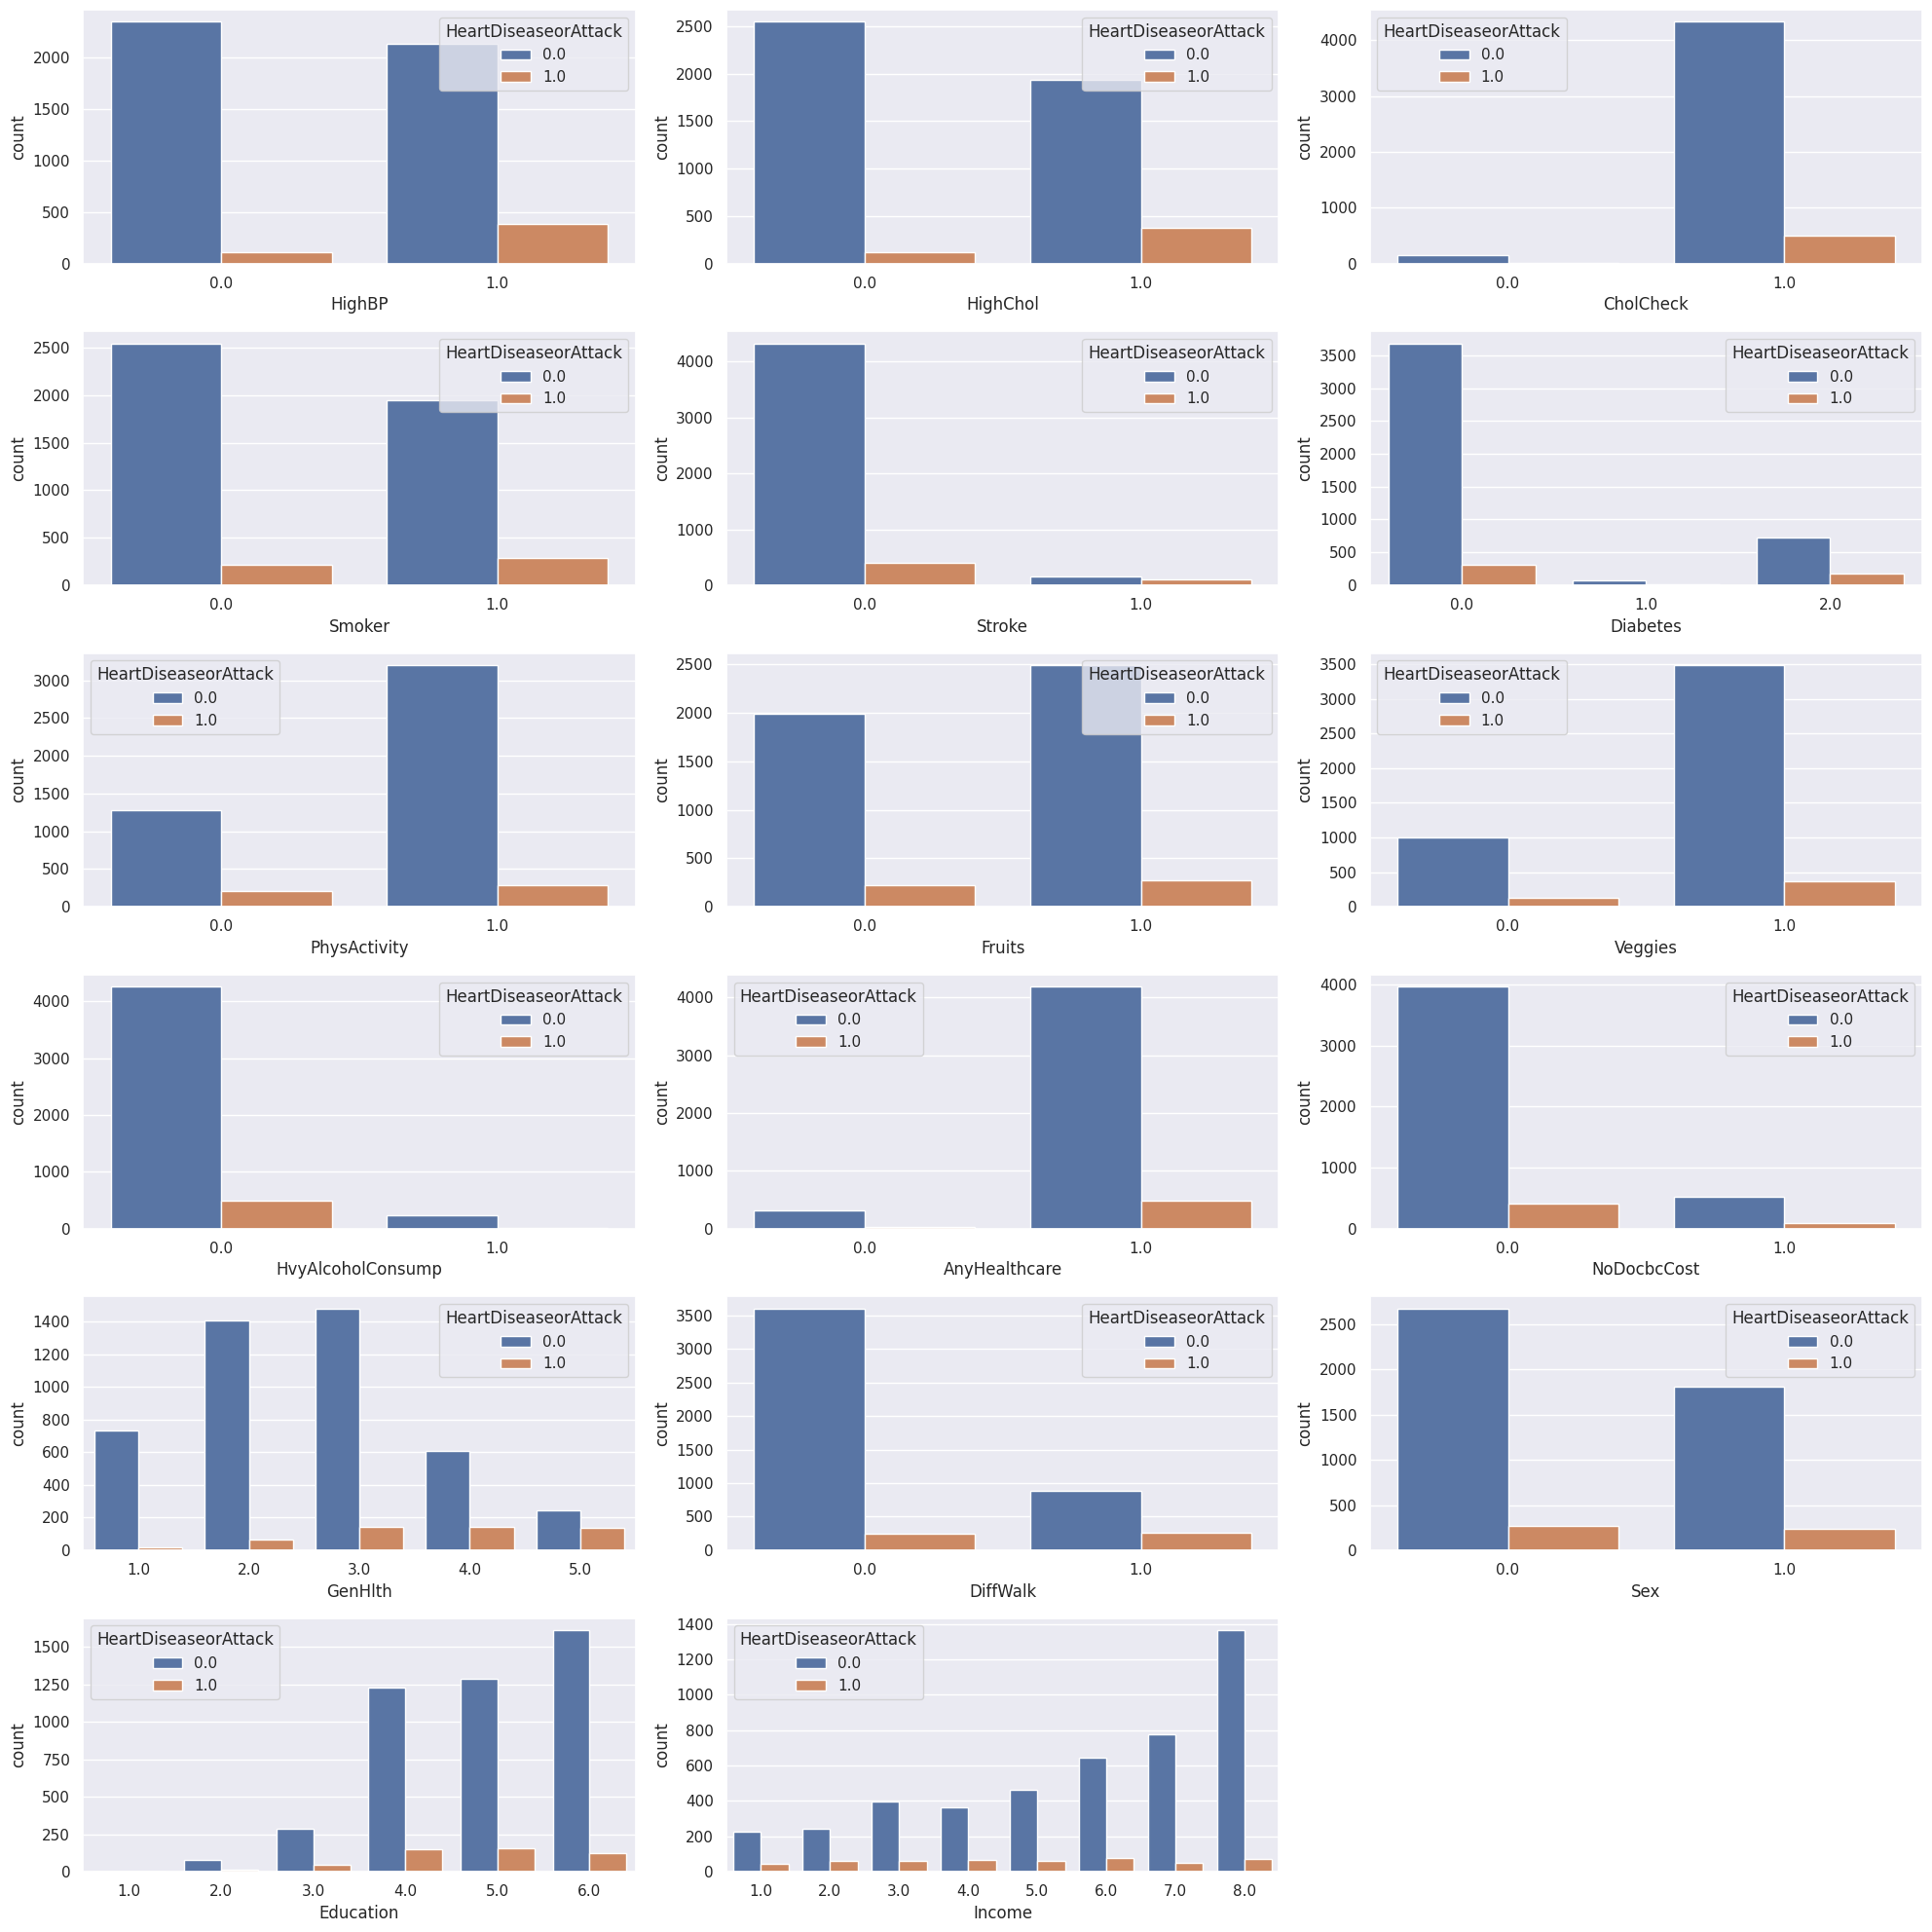

In [18]:

def count_plot(df,columns,label):
    plt.figure(figsize=(20, 20))
    for indx, var  in enumerate(columns):
        plt.subplot(6, 3, indx+1)
        g = sns.countplot(x=var, data=df, hue=label)
    plt.tight_layout()

count_plot(df, cat_columns, 'HeartDiseaseorAttack')

Gerar o mesmo gráfico para os atributos numéricos

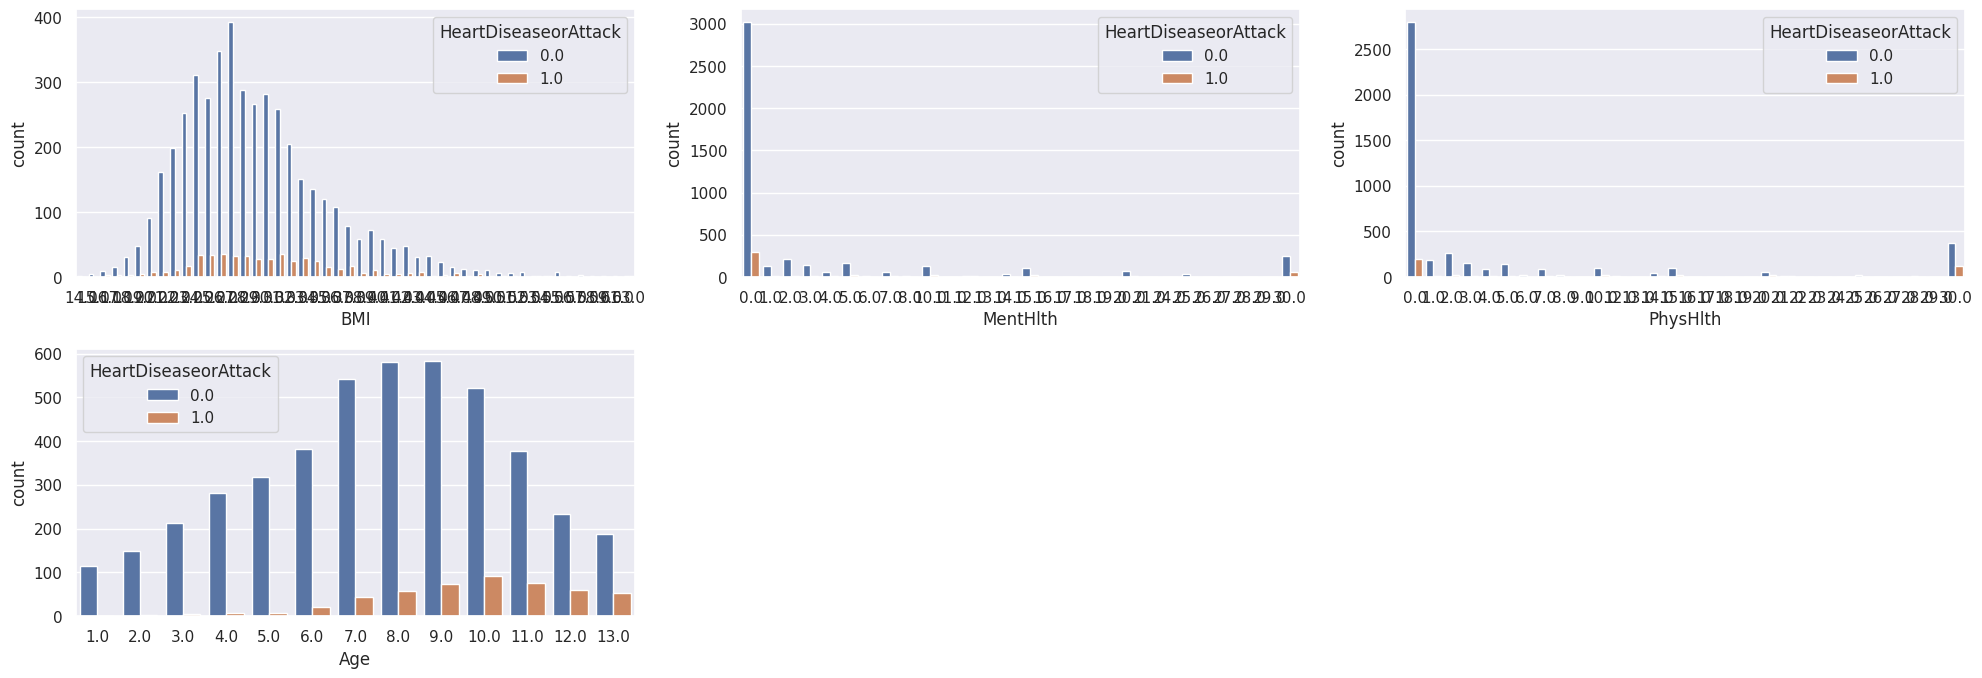

In [19]:
count_plot(df, num_columns, 'HeartDiseaseorAttack')

Vamos gerar algumas estatísticas descritivas.

In [20]:
df.describe()

,HeartDiseaseorAttack,BMI,MentHlth,PhysHlth,Age
count,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000
mean,0.100281,29.146811,3.963097,5.170878,7.857802
std,0.300404,6.491543,8.283822,9.577561,2.974117
min,0.000000,14.000000,0.000000,0.000000,1.000000
25%,0.000000,25.000000,0.000000,0.000000,6.000000
50%,0.000000,28.000000,0.000000,0.000000,8.000000
75%,0.000000,32.000000,3.000000,5.000000,10.000000
max,1.000000,63.000000,30.000000,30.000000,13.000000


O boxplot indica a existência de outliers (univariados) no conjunto de dados.

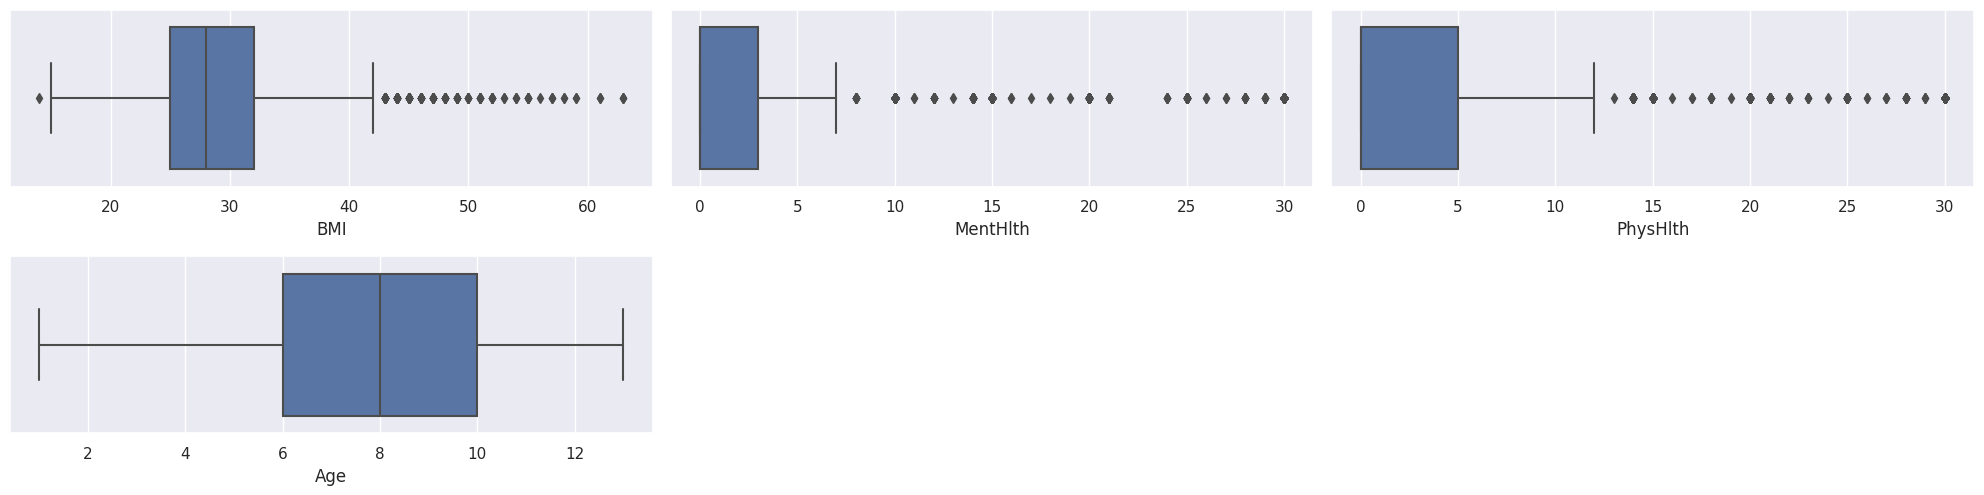

In [21]:
def dist_plot(df,columns,type='boxplot'):
    plt.figure(figsize=(20, 12))
    for indx, var  in enumerate(columns):
        plt.subplot(5, 3, indx+1)
        if (type=='boxplot'):
          g = sns.boxplot(x=var, data=df,showfliers=True)
        else:
          if (type=='histogram'):
            g = sns.histplot(x=var, data=df)
    plt.tight_layout()

dist_plot(df,num_columns)#,type="histogram")


---


## Criando conjuntos de treino e teste para avaliação de modelos


Antes de iniciar o treinamento do modelo, lembre-se que é recomendado sempre reservar uma porção dos dados para teste, a qual somente será utilizada para avaliação do modelo final (após todo o processo de treinamento e otimização de hiperparâmetros).

Vamos fazer esta divisão, separando 20% para teste. Entretanto, primeiro precisamos dividir os dados entre atributos (X) e classe (y). Também iremos codificar os valores categóricos em inteiros a fim de ampliar as opções de algoritmos que podemos utilizar no treinamento dos modelos.



In [22]:
## Separa o dataset em duas variáveis: os atributos/entradas (X) e a classe/saída (y)
X = df.drop(['HeartDiseaseorAttack'], axis=1)
y = df['HeartDiseaseorAttack'].astype(int).values

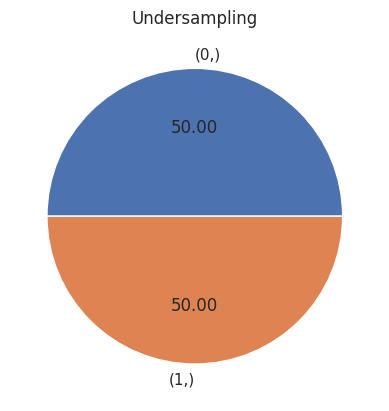

In [23]:
# Balanceamento dos dados
# Fazendo um undersampling aleatório
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_balanced, y_balanced = rus.fit_resample(X, y)

ax = pd.DataFrame(y_balanced).value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Undersampling")

Faz a divisão entre treino (80%) e teste (20%).
O conjunto de treino representa os dados que serão usados ao longo do desenvolvimento do modelo

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.20, stratify=y_balanced, random_state=42)

---


## Pré-Processamento dos Dados

Nesta seção, vamos realizar o pré-processamento dos dados com Pipelines.

### Imputação de valores faltantes e normalização

Em suma, os passos executados para cada tipo de atributo são:

*   atributos **numéricos**: Normalização dos dados pelo método MinMaxScaler.
*   atributos **categóricos**: criar as colunas com 0 e 1 para os atributos com o método OneHotEncoder.
* Normalizar todos os dados com o método StandardScaler(z-score) .



In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## pipeline específico para os atributos numéricos
num_pipeline = Pipeline([
                         ('data-normalize', MinMaxScaler())])

## pipeline específico para os atributos categóricos
cat_pipeline = Pipeline([
                         ('encoder', OneHotEncoder(drop='if_binary', sparse_output=False,
                                                   handle_unknown='infrequent_if_exist', min_frequency=0.09))])

## ColumnTransformer para aplicar cada pipeline ao respectivo tipo de atributo
data_pipeline = ColumnTransformer([
                                   ('numerical', num_pipeline, num_columns),
                                   ('categorical', cat_pipeline, cat_columns)])

# ## define pipeline que une as transformações definidas anteriormente e aplica a
# ## normalização com método StandardScaler() em todos os atributos
prep_pipeline = Pipeline([
                  ('data_transform', data_pipeline),
                  ('data_normalize',StandardScaler()),
                  ('model', None)
                  ])

# ## ajusta o pipeline a partir dos dados de treino, e na sequência aplica em
# ## treino e teste separadamente
prep_pipeline.fit(X_train)
X_train_prep = prep_pipeline.transform(X_train)
X_test_prep = prep_pipeline.transform(X_test)

In [26]:
print(f'Quantidade de valores faltantes em treino: {np.sum(np.isnan(X_train_prep))}')
print(f'Quantidade de valores faltantes em teste: {np.sum(np.isnan(X_test_prep))}')

Quantidade de valores faltantes em treino: 0
Quantidade de valores faltantes em teste: 0


### Visualização pós pré-processamento

Visualizando o formato do conjunto de dados de treinamento após aplicação do Pipeline de pré-processamento de dados.

In [27]:
# ajusta nome das columas
columns = np.append(num_columns,prep_pipeline[0].named_transformers_['categorical']['encoder'].get_feature_names_out(cat_columns))
df_train_prep = pd.DataFrame(X_train_prep, columns=columns)
df_test_prep = pd.DataFrame(X_test_prep, columns=columns)

In [28]:
df_train_prep

,BMI,MentHlth,PhysHlth,Age,HighBP_1.0,HighChol_1.0,CholCheck_infrequent_sklearn,Smoker_1.0,Stroke_1.0,Diabetes_0.0,...,Education_6.0,Education_infrequent_sklearn,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0,Income_infrequent_sklearn
0,1.097819,2.652915,2.002536,-0.907888,0.810133,0.829315,-0.200779,1.046060,2.774104,-1.628793,...,1.496284,-0.326344,-0.331014,-0.349313,-0.340235,2.862761,-0.405565,-0.397168,-0.548464,-0.276977
1,1.984498,-0.543208,-0.672565,-1.974423,0.810133,-1.205814,-0.200779,-0.955968,-0.360477,0.613951,...,-0.668322,-0.326344,-0.331014,2.862761,-0.340235,-0.349313,-0.405565,-0.397168,-0.548464,-0.276977
2,-1.118878,-0.543208,-0.672565,1.580694,0.810133,0.829315,-0.200779,-0.955968,-0.360477,-1.628793,...,-0.668322,-0.326344,-0.331014,-0.349313,-0.340235,-0.349313,2.465694,-0.397168,-0.548464,-0.276977
3,-0.527759,2.652915,-0.672565,-0.907888,-1.234366,0.829315,-0.200779,1.046060,-0.360477,-1.628793,...,1.496284,-0.326344,-0.331014,-0.349313,-0.340235,-0.349313,-0.405565,-0.397168,1.823273,-0.276977
4,0.654480,1.054854,2.002536,-0.196865,0.810133,-1.205814,-0.200779,1.046060,-0.360477,0.613951,...,1.496284,-0.326344,-0.331014,-0.349313,-0.340235,2.862761,-0.405565,-0.397168,-0.548464,-0.276977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.232199,-0.117058,-0.048375,-0.552376,0.810133,0.829315,-0.200779,1.046060,-0.360477,0.613951,...,-0.668322,3.064247,-0.331014,-0.349313,-0.340235,2.862761,-0.405565,-0.397168,-0.548464,-0.276977
796,-0.823318,2.652915,-0.672565,-0.552376,0.810133,0.829315,-0.200779,1.046060,-0.360477,0.613951,...,-0.668322,-0.326344,-0.331014,-0.349313,-0.340235,-0.349313,-0.405565,-0.397168,1.823273,-0.276977
797,0.654480,-0.543208,-0.672565,0.514159,0.810133,0.829315,-0.200779,1.046060,-0.360477,-1.628793,...,-0.668322,-0.326344,-0.331014,-0.349313,-0.340235,-0.349313,2.465694,-0.397168,-0.548464,-0.276977
798,-0.823318,-0.543208,-0.672565,1.580694,-1.234366,-1.205814,-0.200779,-0.955968,-0.360477,0.613951,...,-0.668322,-0.326344,-0.331014,-0.349313,2.939142,-0.349313,-0.405565,-0.397168,-0.548464,-0.276977


Características gerais do dataset após pré-processamento

In [29]:
print("O conjunto de dados possui {} linhas e {} colunas referentes a atributos".format(df_train_prep.shape[0], df_train_prep.shape[1]))

O conjunto de dados possui 800 linhas e 37 colunas referentes a atributos


In [30]:
df_train_prep.describe()

,BMI,MentHlth,PhysHlth,Age,HighBP_1.0,HighChol_1.0,CholCheck_infrequent_sklearn,Smoker_1.0,Stroke_1.0,Diabetes_0.0,...,Education_6.0,Education_infrequent_sklearn,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0,Income_infrequent_sklearn
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-5.118128e-15,1.509903e-16,5.995204e-16,1.030287e-15,-3.996803e-17,-4.218847e-17,3.108624e-17,-6.217249e-17,-1.776357e-17,6.439294e-17,...,-1.088019e-16,3.552714e-17,-3.552714e-17,2.775558e-17,-3.552714e-17,2.442491e-17,1.332268e-17,1.831868e-17,-3.108624e-17,2.553513e-17
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,...,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-2.301116e+00,-5.432077e-01,-6.725649e-01,-2.685446e+00,-1.234366e+00,-1.205814e+00,-2.007787e-01,-9.559684e-01,-3.604768e-01,-1.628793e+00,...,-6.683222e-01,-3.263444e-01,-3.310137e-01,-3.493131e-01,-3.402354e-01,-3.493131e-01,-4.055654e-01,-3.971680e-01,-5.484642e-01,-2.769766e-01
25%,-6.755384e-01,-5.432077e-01,-6.725649e-01,-5.523762e-01,-1.234366e+00,-1.205814e+00,-2.007787e-01,-9.559684e-01,-3.604768e-01,-1.628793e+00,...,-6.683222e-01,-3.263444e-01,-3.310137e-01,-3.493131e-01,-3.402354e-01,-3.493131e-01,-4.055654e-01,-3.971680e-01,-5.484642e-01,-2.769766e-01
50%,-2.321990e-01,-5.432077e-01,-6.725649e-01,1.586471e-01,8.101325e-01,8.293152e-01,-2.007787e-01,-9.559684e-01,-3.604768e-01,6.139514e-01,...,-6.683222e-01,-3.263444e-01,-3.310137e-01,-3.493131e-01,-3.402354e-01,-3.493131e-01,-4.055654e-01,-3.971680e-01,-5.484642e-01,-2.769766e-01
75%,5.067000e-01,-1.052057e-02,5.758155e-01,8.696703e-01,8.101325e-01,8.293152e-01,-2.007787e-01,1.046060e+00,-3.604768e-01,6.139514e-01,...,1.496284e+00,-3.263444e-01,-3.310137e-01,-3.493131e-01,-3.402354e-01,-3.493131e-01,-4.055654e-01,-3.971680e-01,-5.484642e-01,-2.769766e-01
max,4.644534e+00,2.652915e+00,2.002536e+00,1.580694e+00,8.101325e-01,8.293152e-01,4.980608e+00,1.046060e+00,2.774104e+00,6.139514e-01,...,1.496284e+00,3.064247e+00,3.021023e+00,2.862761e+00,2.939142e+00,2.862761e+00,2.465694e+00,2.517826e+00,1.823273e+00,3.610414e+00


### Implementação da Rede Neural

Explicação do código

In [37]:
inputs = np.array([[-1, 0.33, 3, 2  , 1, 2, 1.55, -1, 0.33, 3, 2, 1, 2],
                   [-2, 1.33, 1, 2.6, 1, 2, 1.77, -1, 0.33, 3, 2, 1, 2],
                    [-1, 0.33, 3, 2, 1, 2, 1.55, -1, 0.33, 3, 2, 1, 2],
                    [-2, 1.33, 1, 2.6, 1, 2, 1.77, -1, 0.33, 3, 2, 1, 2],
                    [-2, 1.33, 2, 2.6, 1, 2, 1.77, -1, 0.44, 3, 2, 1, 2],
                    [-2, 1.33, 3, 2.6, 1, 2, 1.77, -1, 0.44, 3, 2, 0, 2],
                    [-1, 1.33, 3, 0.6, 1, 2, 1.77, -1, 0.44, 3, 2, 0, 2]
                   ])

targets = np.array([[0], [1], [0], [0], [1], [1], [1] ])

print(type(inputs))
print(type(targets))
print(inputs.shape)
print(targets.shape)

print(type(X_train_prep))
print(type(y_train))
print(X_train_prep.shape)
print(y_train.shape)

y_treino = y_train.reshape((800, 1))

print(type(y_treino))
print(y_treino.shape)



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7, 13)
(7, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(800, 37)
(800,)
<class 'numpy.ndarray'>
(800, 1)


In [46]:
from joblib.parallel import sqrt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1- sigmoid(x))

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)

        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, inputs):
        self.hidden_activation = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_activation)

        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, inputs, targets, learning_rate):
        error = targets - self.predicted_output

        d_output = error * sigmoid_derivative(self.predicted_output)
        error_hidden = d_output.dot(self.weights_hidden_output.T)

        d_hidden = error_hidden * sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.weights_input_hidden += inputs.T.dot(d_hidden) * learning_rate

        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, inputs, targets, learning_rate, epochs):
        for epoch in range(epochs):
            self.forward(inputs)
            self.backward(inputs, targets, learning_rate)

            if epoch % 100 == 0:
                error = np.mean(np.square(targets - self.predicted_output))
                #print(f"Epoch {epoch}, Error: {error}")

# Exemplo de uso
np.random.seed(42)

# Dados de entrada e saída de exemplo
'''
inputs = np.array([[-1, 0.33, 3, 2  , 1, 2, 1.55, -1, 0.33, 3, 2, 1, 2],
                   [-2, 1.33, 1, 2.6, 1, 2, 1.77, -1, 0.33, 3, 2, 1, 2],
                    [-1, 0.33, 3, 2, 1, 2, 1.55, -1, 0.33, 3, 2, 1, 2],
                    [-2, 1.33, 1, 2.6, 1, 2, 1.77, -1, 0.33, 3, 2, 1, 2],
                    [-2, 1.33, 2, 2.6, 1, 2, 1.77, -1, 0.44, 3, 2, 1, 2],
                    [-2, 1.33, 3, 2.6, 1, 2, 1.77, -1, 0.44, 3, 2, 0, 2],
                    [-1, 1.33, 3, 0.6, 1, 2, 1.77, -1, 0.44, 3, 2, 0, 2]
                   ])

targets = np.array([[0], [1], [0], [0], [1], [1], [1] ])
'''

inputs = X_train_prep
targets = y_treino

# Criação da rede neural
# input_size = 13
input_size = 37
hidden_size = 37
output_size = 1
learning_rate = 0.1
epochs = 10000

nn = NeuralNetwork(input_size, hidden_size, output_size)

# Treinamento da rede neural
nn.train(inputs, targets, learning_rate, epochs)

# Teste da rede neural treinada
acertos = 0
erros = 0
corte = 0.5

for i in range(inputs.shape[0]):
    predicted = nn.forward(inputs[i])
    if (y_treino[i] - predicted)**2 < corte:
      acertos = acertos + 1
    else:
      erros = erros + 1

    print(f"y_treino: {y_treino[i]}, Predicted: {predicted}")

print(f"acertos: {acertos}, erros: {erros}")
print(f"acuracia: {acertos/(acertos+erros)}")


<ipython-input-46-8c1634dbf6fb>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


y_treino: [1], Predicted: [[1.]]
y_treino: [0], Predicted: [[0.00028549]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [0], Predicted: [[0.31342738]]
y_treino: [1], Predicted: [[1.]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [1], Predicted: [[0.99993739]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [1], Predicted: [[0.94480915]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [0], Predicted: [[0.66245427]]
y_treino: [0], Predicted: [[0.66245427]]
y_treino: [0], Predicted: [[0.66245427]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [1], Predicted: [[0.00028549]]
y_treino: [0], Predicted: [[0.00028549]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [0], Predicted: [[0.00028549]]
y_treino: [1], Predicted: [[0.66245427]]
y_treino: [1], Predicted: [[0.66